In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import runner
import config

In [3]:
Omega_a_h_sq_harm, theta_i_s_harm, f_a_s_harm = runner.load_data(config.data_path + "/harmonic.npz")
Omega_a_h_sq, theta_i_s, f_a_s = runner.load_data(config.data_path + "/cosine.npz")

In [18]:
f = Omega_a_h_sq / Omega_a_h_sq_harm
f = np.mean(f, axis=1)[:-1]
theta = theta_i_s_harm[:-1]

In [20]:
def fit_fn(theta, alpha, beta):
    return np.log(np.exp(1) / (1 - (theta/np.pi)**2)**beta)**alpha

In [21]:
turner = (7/6, 2)
p, cov = curve_fit(fit_fn, theta, f, p0=turner, method="dogbox")
err = np.sqrt(np.diag(cov))
print(p, err)

[1.92825292 0.33441749] [0.01180868 0.00303527]


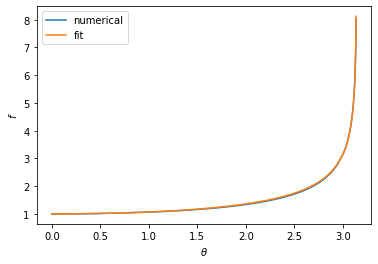

In [23]:
plt.plot(theta, f, label="numerical")
plt.plot(theta, fit_fn(theta, *p), label="fit")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f$")
plt.legend()
plt.savefig(config.plot_path + "/anharm_fit.pdf")